<a id="back_to_top"></a>
# Market Segmentation and Consumer Behavior
by Carloz Gil

*The Notebook contains links that don't operate on Github. It is recommended to view the project below:*<br>
link

## Table of Contents
- [Introduction](#intro)
    - [Data Source](#data)
- [Import Libraries and Datasets](#import)
- [Data Visualization and Manipulation](#viz)
    - [Handling Missing and Unnecessary Data](#missing)
    - [Histplot Visualization](#histplot)
    - [Correlation Heatmap](#correlation)
- [Elbow Method](#elbow)
- [KMeans Technique](#kmeans)
    - [Applying the Algorithm](#apply)
    - [Assumptions and Observations](#assumptions)
    - [Preparing the df](#df)
- [Principal Component Analysis (PCA)](#pca)
    - [Visualization](#pca_viz)
- [Deep Learning](#DP)
- [KMeans and Autoencoder](#kencoder)

<a id="intro"></a>
## Introduction

### Executive Summary
2-3 sentences using key terms

I apply an unsupervised learning technique, KMeans, to perform customer market segmentation

### Goals and Objectives
Research to perhaps target certain consumers and launch specific marketing campaigns with promos

<a id="data"></a>
### Data Source
We will be using a credit card dataset from Kaggle specifically designed for practicing clustering algorithms. It can be obtained below:

https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/download?datasetVersionNumber=1

It is unclear whether this is a fictional dataset or not. Since the goal of this project is to apply unsupervised algorithms and practice using deep learning techniques to perform market segmentation, this dataset is quite useful. I believe there are benefits to gathering your own data and practicing data cleaning and manipulation. The focus of this project is on different, but I do have a entire project on data collection and manipulation titled **Mergers & Acquisition - Stock Price Prediction**

https://nbviewer.org/github/clozgil/Mergers-Acquisition-Stock-Price-Prediction/blob/main/Mergers%20%26%20Acquisition%20-%20Stock%20Price%20Prediction.ipynb

### Disclaimer
All credit goes to Dr. Ryan Ahmed from McMaster Univesrity in Canada. I've enjoyed his work on using data science to solve business problems. This is my second project that follows some of the research and exercises he's done. It is merely my interpretation of his instruction.

There are "Back to the Top Links" all throughout the project that, if viewed in nbviewer, should return you to the table of contents

**Goals**
- Kmeans
- Deep learning (autoencoder)

Start with 17 features, use autoencoder and deep learning to narrow it down to 10 features. Use principal component analysis to drop down to 2 components

Apply dimensionality reduction

Good to perform market segmentation

**recap**

Import libararies and data, visualize the data and fill up all null, data visuzalization using displot, correlation graph, apply KMean, elbow method, came up with the uptimal num oif clusters using the elbowmethod, apply kmean using on the raw data, we were able to identify 4 different types of customers so that we can launch a target campaign to them, learn about PCA and how we can viz, deep learning with autoencoders to perform dimensionality reduction, 17 features to 10 features, apply Kmeans again with new 10 features to perform clustering, perform PCA and viz again

This is an additional test

<a id="import"></a>
## Import Libraries and Datasets

In this section we will import all necessary libaries (data manipulation, visualization, and algorithms), load dataset, and make some very brief observations

In [222]:
#Data Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
# Algorithm Libraries

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [224]:
#to make this a crisp-looking notebook, we'll remove warning lables

pd.options.mode.chained_assignment = None

In [225]:
#load dataset

cc_df = pd.read_csv('Marketing_data.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [226]:
cc_df.shape

(8950, 18)

**General Observations**

There ~9000 entries in the dataset. To initially understand the data, we will use the `descirbe()` method to understand the means and max of certain values. BALANCE is amount left in their account. Below we can see that the average balance in an account is ~$1500. Cash advance on average is ~$1000. And the average tenure of the consumer is around 11 years.

A notable observation below is the max ONOFF_PURCHASE, which is the maximum purchase amount done at once, is $40,761. This could be a car or something signifiant.  

In [227]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**High One Off Purchase**<br>
Let's observe the individual with the very large one off purchase.

Here are some observations and assumptions about the individual
- Makes a lot of purchases (some clearly very large). PURCHASES = 49,039, but not a lot of cash advance
- ONEOFF_PURCHASES_FREQUENCY, which is a percentage of how frequent the individual does one off purchases (0 not frequent, 1 very frequent), is very high. Perhaps an impulsive buy with money?
- CASH_ADVANCE_FREQUENCY, which is a percentage of how frequent the individual uses cash advance, is only 8%. Cash advances have incredibly high interest rates, so it is possible this individual is sensitive to oweing money.
- Would not make sense to target with any kind of cash promo and marketing campaigns

In [228]:
cc_df[cc_df['ONEOFF_PURCHASES'] == cc_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**High Cash Advance**<br>
Cash advance has always been a way for banks to charge higher interest rates to individuals. It is not a financially wise move for the consumer, but it might be valuable for banks to target consumers who enjoy using cash advance.

The below individual is someone who has used $47,137 in cash advance
- This individual likes cash advance options and his purchase frequency is substantially high.
- CASH_ADVANCE_TRX, which are the transactions used with cash from credit card, is 123. Very high in general.
- CASH_ADVANCE_FREQUENCY is understably very high

In [229]:
cc_df[cc_df.CASH_ADVANCE == cc_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


From the quick exploration done above, we can tell we have atleast two dimensions we can explore: purchase amounts (high one off purchases or people with low/high balances in their account) and purchase methods (cash advance, credit card).

[Back to the top](#back_to_top)

<a id="viz"></a>
## Data Visualization and Manipulation
- Handling Missing and Unnecessary Data 
- Displot Visualization
- Correlation Heatmap

<a id="missing"></a>
### Handling Missing and Unnecessary Data

Kaggle datasets are usually very complete. Still, let us visualize if there are any missing values

<AxesSubplot:>

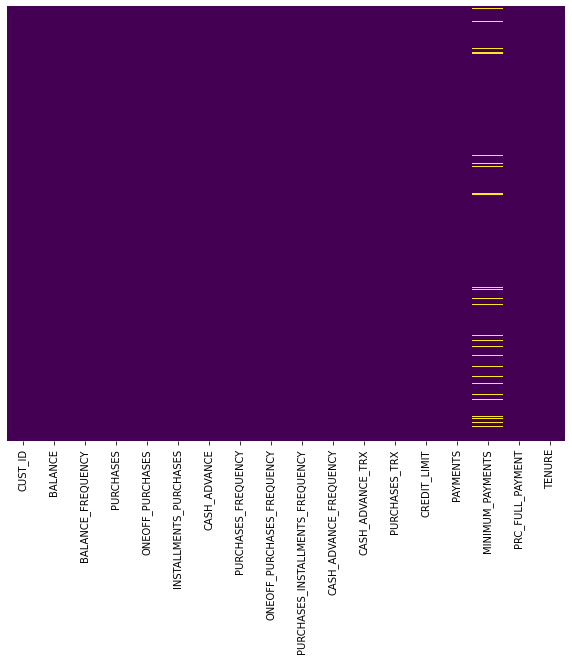

In [230]:
plt.rc('figure', figsize = (10, 8))
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

While it is very clear that there is only missing values in MINIMUM_PAYMENTS, let's get numeric values to see if there are any other missing values

In [231]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [232]:
print('The "Minimum payments" column is missing only', round(cc_df.MINIMUM_PAYMENTS.isnull().sum() / cc_df.shape[0] * 100, 4), "% of its column")

The "Minimum payments" column is missing only 3.4972 % of its column


#### Filling In Missing Values

Since both MINIMUM_PAYMENTS and CREDIT_LIMIT are missing very few values. We will go ahead and impute values using the average of each column

In [233]:
cc_df.CREDIT_LIMIT.fillna(value = cc_df.CREDIT_LIMIT.mean(), inplace=True)

cc_df.loc[cc_df.MINIMUM_PAYMENTS.isnull() == True, 'MINIMUM_PAYMENTS'] = cc_df.MINIMUM_PAYMENTS.mean()

In [234]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

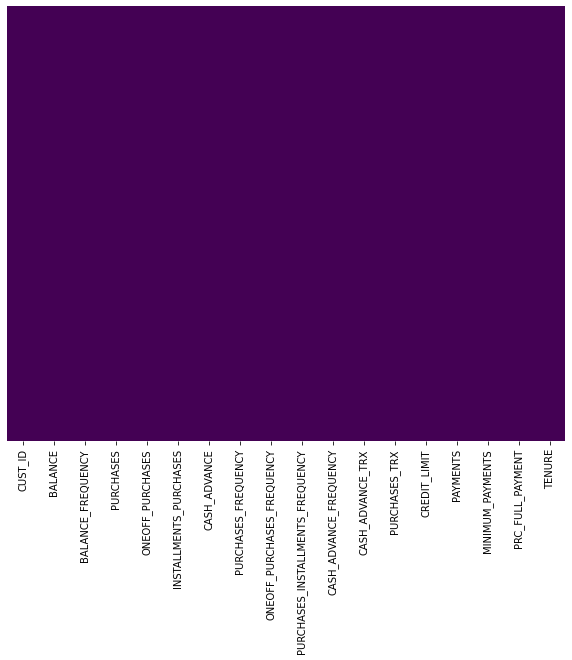

In [235]:
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

#### Unnecessary Data

The entire dataset seems valuable, so we will keep everything except the customer id column

In [236]:
cc_df.drop('CUST_ID', axis = 1, inplace=True)

In [237]:
cc_df.shape

(8950, 17)

[Back to the top](#back_to_top)

<a id="histplot"></a>
### Histplot Visualization

In [238]:
len(cc_df.columns)

17

Given that we only have 17 columns, we will plot a histogram for each column and visualize it using subplots. We will pay particulat attention to the kernal density estimate (KDE) to undestand the probability density of continuous variables

Here are a couple of observations from the below visual:
- Purchase Frequency: the data shows there seems to be two different types of clusters: one cluster who doesn't purchase a lot, and another who spends quite a bit
- Balance: Yes, there are some customers with very high balances, but for the most part they are all between 0 - 2500 (which matches the mean established with the describe() method above)
- Purchases: everything for the most part is under 10,000

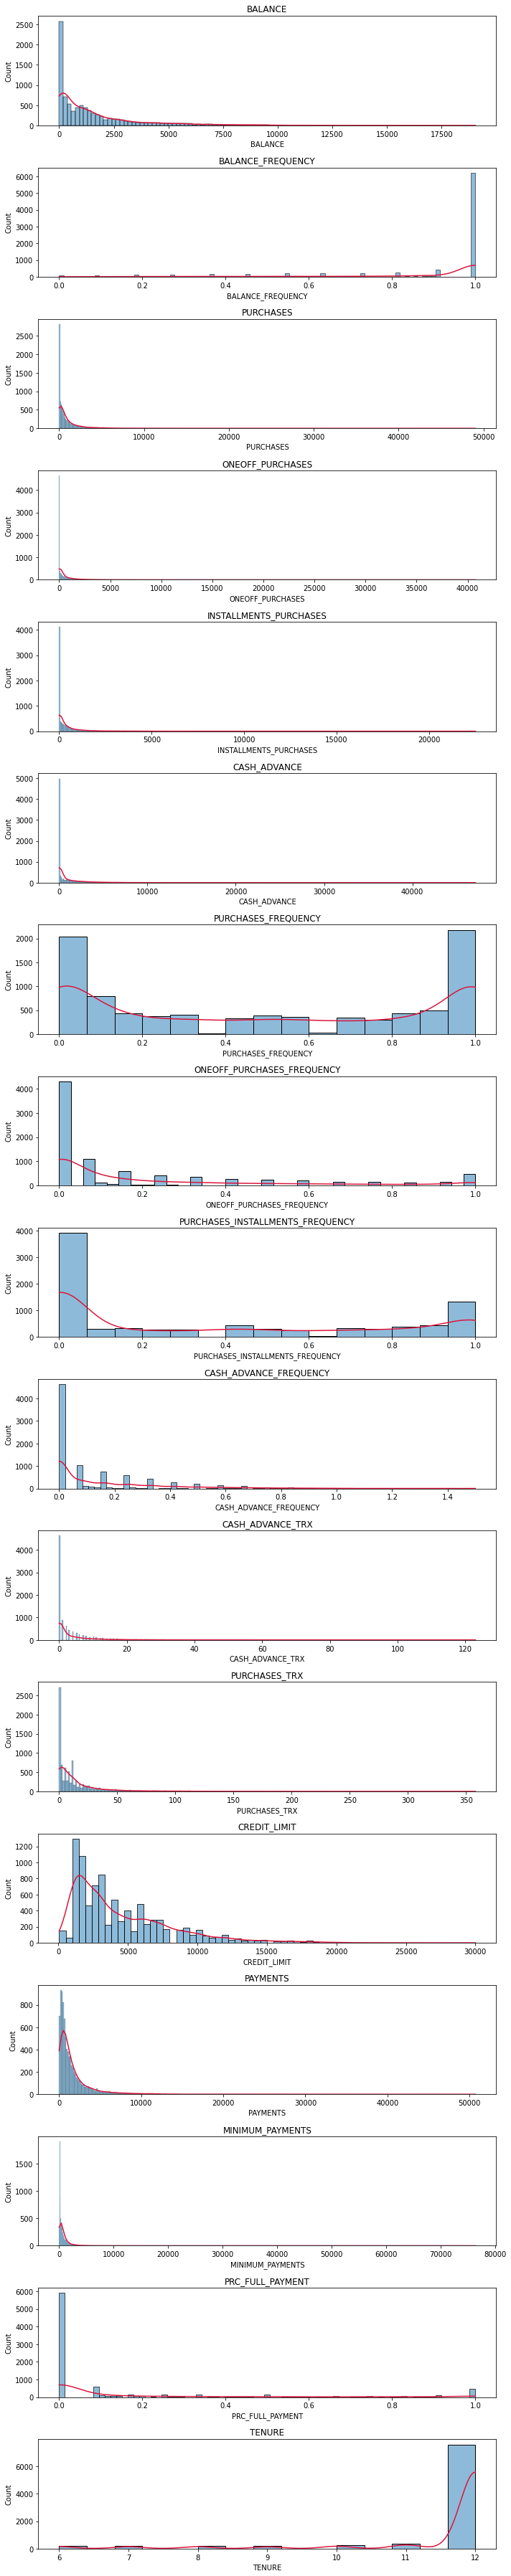

In [239]:
plt.figure(figsize=(10, 50))
for i in range(17):
    plt.subplot(17, 1, i+1)
    ax = sns.histplot(cc_df[cc_df.columns[i]], kde=True)
    plt.title(cc_df.columns[i])
    ax.lines[0].set_color('crimson')

plt.tight_layout()

<a id="correlation"></a>
### Correlation Heatmap

<AxesSubplot:>

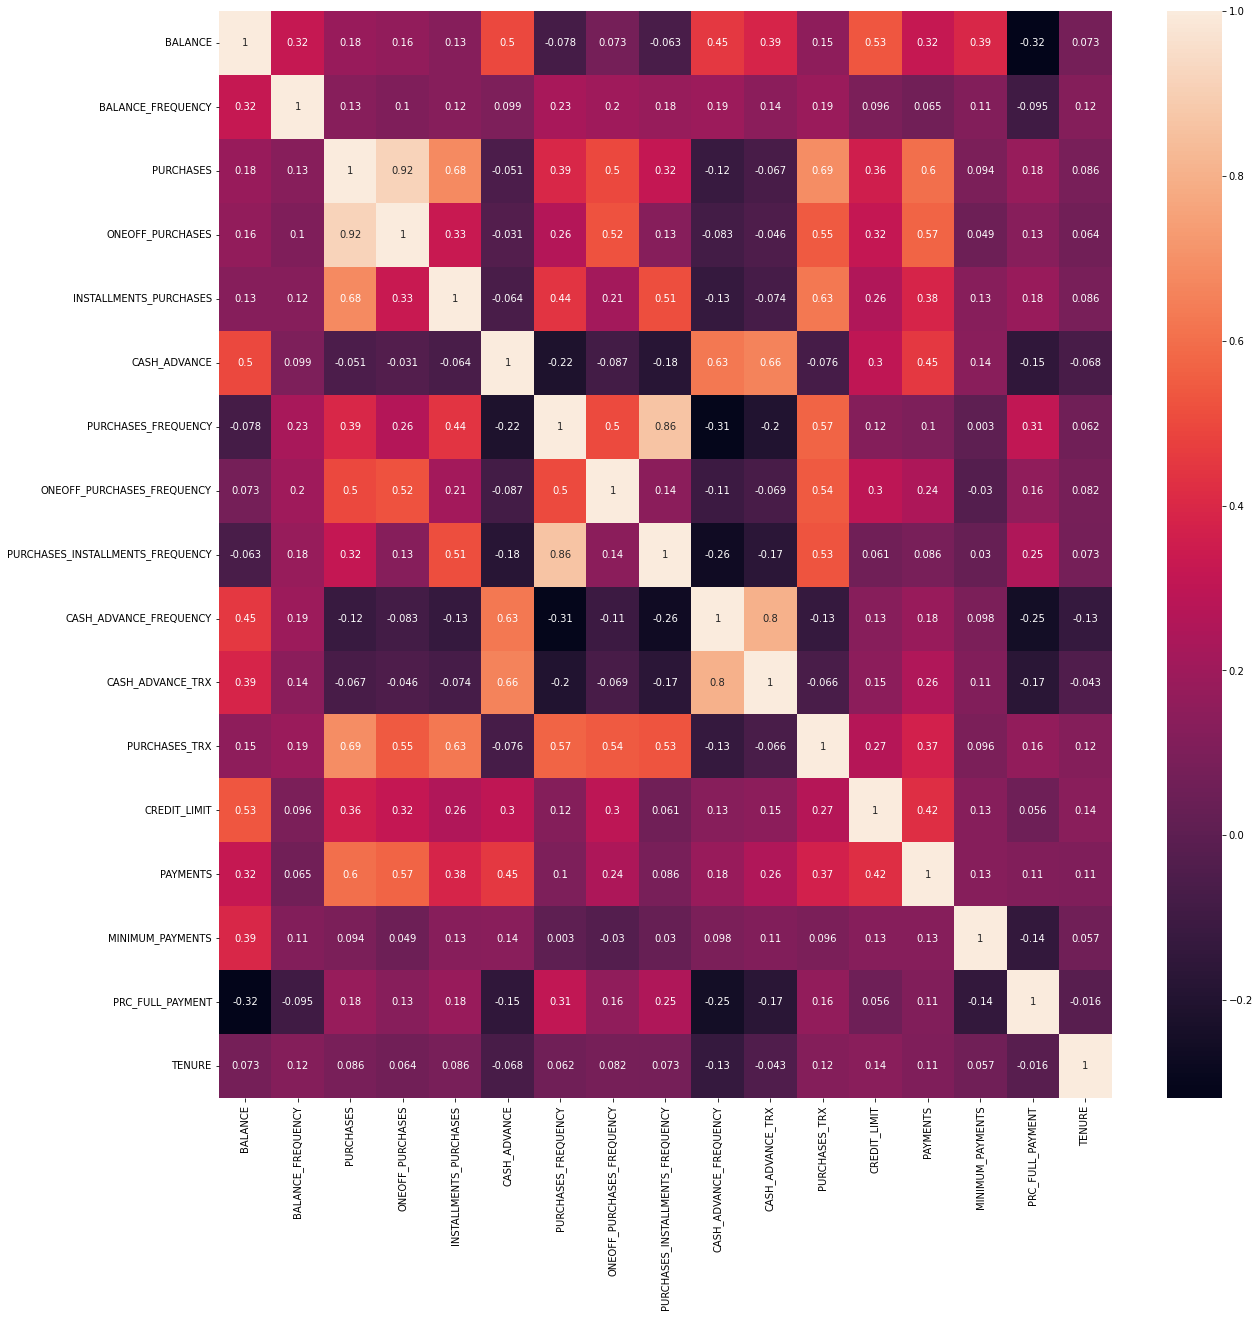

In [240]:
plt.figure(figsize=(20,20))
sns.heatmap(cc_df.corr(), annot=True)

Below are some observations on the heatmap above:
- Initial observation is that there are a good number of correlations between variables
- ONEPFF_PURCHASES and PURCHASES are signifcantly correlated (as expected)
- INSTALLMENTS_PURCHASES and PURCHASES are signifacntly correlated

[Back to the top](#back_to_top)

<a id="elbow"></a>
## The Elbow Method
- Scaling Data
- The Elbow Method

In preparation for applying the KMeans algorithm, we will use the Elbow Method to determin the optimal number of clusters K.

**Scaling Data**

We will begin by scaling our data since the values in this data set vary tremendously, which could impact the quality of our algorithm

In [241]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cc_df)

In [242]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

**The Elbow Method**

In [243]:
scores = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

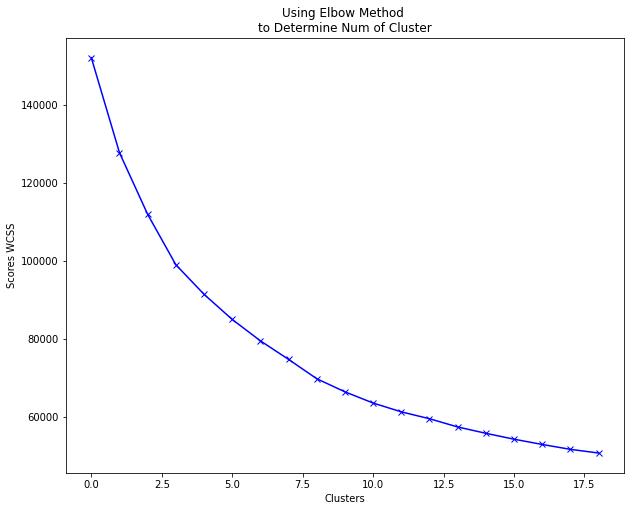

In [244]:
plt.plot(scores, 'bx-')
plt.title('Using Elbow Method \nto Determine Num of Cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

Since there is a notable plateau around 8 clusters, we will use K = 8.

[Back to the top](#back_to_top)

<a id="kmeans"></a>
## KMeans Technique
- Applying the Algorithm
- Assumptions and Observations
- Preparing the df
- Visualization

In this section we will begin applying our first unsupervised clustering algorithm, make some generalizations, and visualize the result. Using the elbow method, we determined that the obtimal number of clusters was 8. 

<a id="apply"></a>
### Applying the Algorithm

In [245]:
kmeans = KMeans(8)
kmeans.fit(df_scaled) # will used the scalaed df establihed in the Elbow Method section
labels = kmeans.labels_

In [246]:
labels

array([1, 5, 3, ..., 0, 0, 0], dtype=int32)

In [247]:
print('clusters range from ', labels.min(), 'to ', labels.max())

clusters range from  0 to  7


In [248]:
#each row is a cluster
kmeans.cluster_centers_.shape

(8, 17)

We'll create a df with the clusters as the rows and inverse the transformation so that we can make some generalizations about the clusters

In [249]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
1,0.014560,0.403850,-0.357626,-0.241923,-0.401035,-0.094470,-0.855803,-0.395340,-0.757178,0.104508,-0.027444,-0.482530,-0.303680,-0.250330,-0.005523,-0.455519,0.273329
2,1.053889,0.465888,2.466956,1.772021,2.577565,-0.155418,1.166544,1.531122,1.278111,-0.282109,-0.151742,3.087196,1.284011,1.422939,0.737820,0.240379,0.337910
3,-0.131246,0.400131,0.540069,0.669568,0.046689,-0.328835,0.980157,1.901210,0.173838,-0.412605,-0.328752,0.618114,0.437495,0.149546,-0.157740,0.443433,0.268936
4,-0.365265,0.333082,-0.036421,-0.242114,0.358500,-0.363810,0.989122,-0.382548,1.200235,-0.473848,-0.360204,0.187270,-0.261452,-0.217637,-0.052618,0.312488,0.256413
5,1.682091,0.391863,-0.219584,-0.155886,-0.232879,2.019692,-0.477889,-0.209753,-0.419310,1.924788,1.930124,-0.270131,1.025421,0.820437,0.509079,-0.390634,0.068842
6,-0.701258,-2.140285,-0.310336,-0.234722,-0.302444,-0.322272,-0.554827,-0.441460,-0.440553,-0.521236,-0.376356,-0.419376,-0.176011,-0.202115,-0.256800,0.283165,0.198977
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


We'll perform inverse transformation on the scaled data to better analyze it

In [250]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
1,1594.781140,0.972939,239.131071,190.894971,48.416318,780.763662,0.146875,0.084520,0.063516,0.156057,3.061544,2.715950,3389.536295,1008.462200,851.334554,0.020483,11.883103
2,3758.054892,0.987635,6273.894903,3533.629086,2741.927867,652.952246,0.958541,0.659221,0.872392,0.078691,2.213296,91.445983,9166.204986,5852.412262,2583.664264,0.224021,11.969529
3,1291.296932,0.972058,2157.071335,1703.783141,453.288194,289.287860,0.883735,0.769625,0.433525,0.052578,1.005338,30.073843,6086.234228,2166.064801,496.600611,0.283411,11.877224
4,804.206597,0.956175,925.390544,190.577402,735.255141,215.944035,0.887333,0.088336,0.841441,0.040322,0.790698,19.364671,3543.181693,1103.107310,741.582603,0.245112,11.860465
5,5065.605895,0.970099,534.059735,333.698618,200.478249,5214.260387,0.298550,0.139884,0.197793,0.520314,16.420507,7.995392,8225.350859,4108.228688,2050.593199,0.039461,11.609447
6,104.865352,0.370257,340.166450,202.846306,137.571031,303.051343,0.267672,0.070762,0.189350,0.030840,0.680473,4.285714,3854.048558,1148.040394,265.744196,0.236535,11.783601
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


<a id="assumptions"></a>
### Assumptions and Observations

The above dataframe has 8 rows, one for each cluster.Let's make some assumptions and generalization about 3 clusters
- **First cluster (row 6): Low spending, cautious. These people tend to be very concervative with spending. Pay off in full, and probably don't rack up interest rates. Don't like cash advance. Might not be a good cluster to send promos**
    - Lowest balance on the credti card: 104
    - Cash advance is relatively low: 300 (compared to 1000 and 5000)
    - Purchase frequency is low: 27% (second lowest with 15% being the lowest)
    - Purchase transaction is second lowest: ~4
    - Pays off credit card very frequently: 23%
<br>
- **Second cluster (row 5): High balance, high cash advance. These are individuals who use their credit cards for cash and don't pay it off in full very often. Might be good consumers to target if a bank wants to capitalize on interest rate payments**
    - Highest use of cash advance out of all clusters: ~5000 
    - Second highest balance: ~5000
    - Half of their expenses are done with cash. Cash Advance: 51%
    - Highest number of cash advance transactions: 16
    - Low percentage of paying in full: 3%
<br>
- **Third cluster(row 1): These are the young individuals with low credit limit. It is clear there is some urge to spend, but a cap could be preventing them. Might be good to further analyze these and see who is eligable for an increase**
    - Youngest consumers. Tenure: 7 years while everyone is 11
    - 3rd in cash advance amount: 1000
    - But don't spend cash very frequently: 19%
    - Low credti limit: 2450

<a id="df"></a>
### Preparing the df

Now that we've ran a kmeans algorithm and placed consumers in clusters, let's add that cluster to the orignal df. We will add a column, assigning each consumer a cluster

In [251]:
labels.shape

(8950,)

In [252]:
#create a df that includes the clusters
clusters = pd.DataFrame({'clusters':labels})

#concat the new df with our original df
#cc_df being the original, none scaled df
cluster_df = pd.concat([cc_df, clusters], axis = 1)

In [253]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


### Visualization

Now that we've prepared a df that includes clusters, let's plot a histogram of the various clusters, paying attention to each row.

**The below visual is very valuable as we can visualize each column from each cluster. We can get a better idea of consumer behavior, their spending habits, and how they match up against general trends.**
- Cluster 5 below is what I refered to as *Second Cluster* above. These individuals have a high balance and use cash advance very regularly
- A lot of cash advance trx in cluster 5. Could be very lucrative

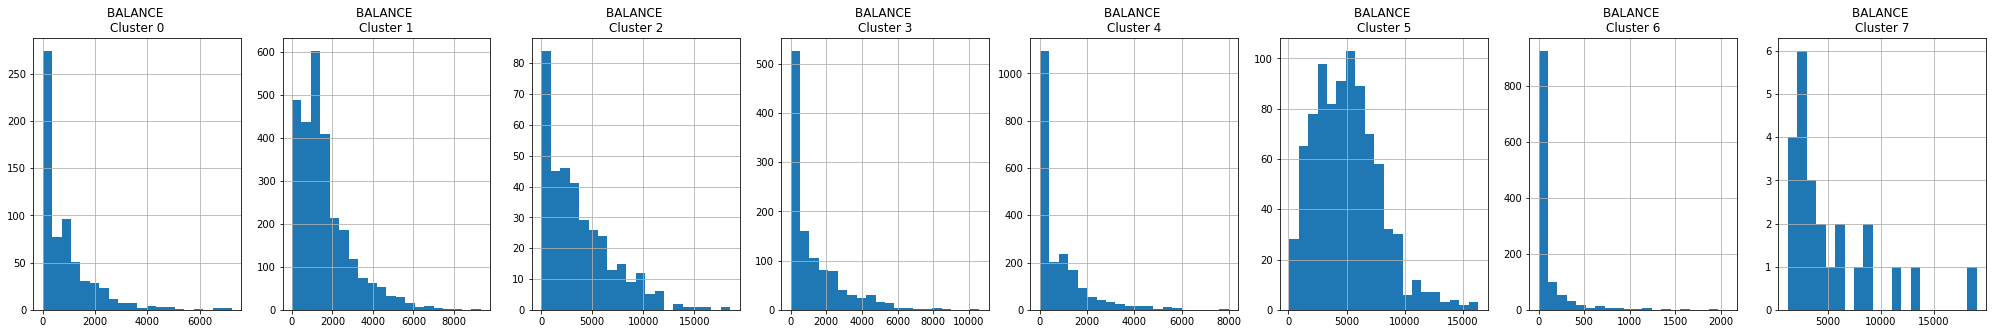

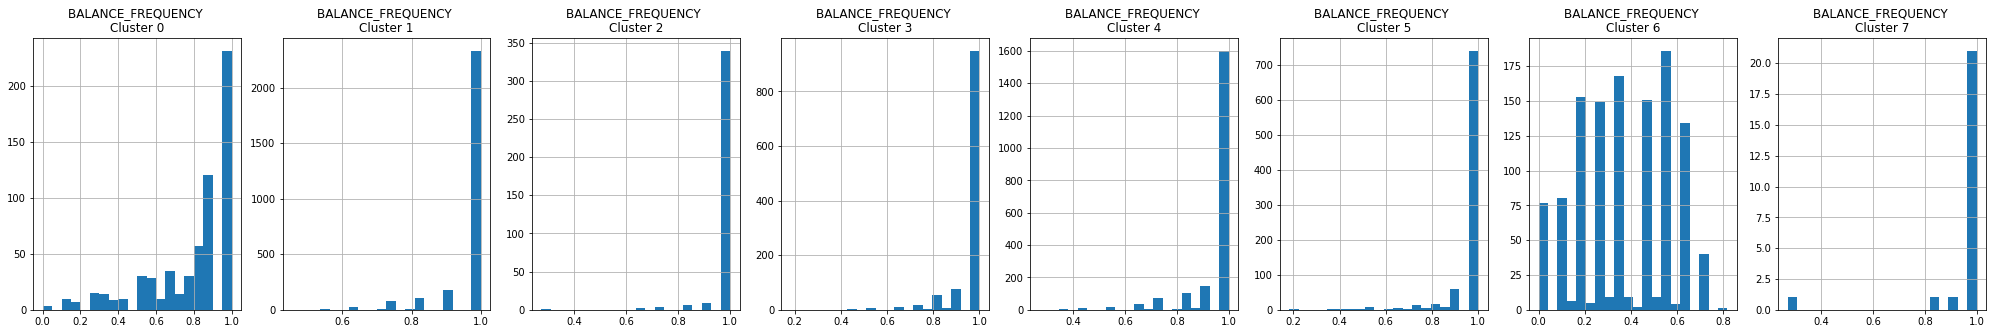

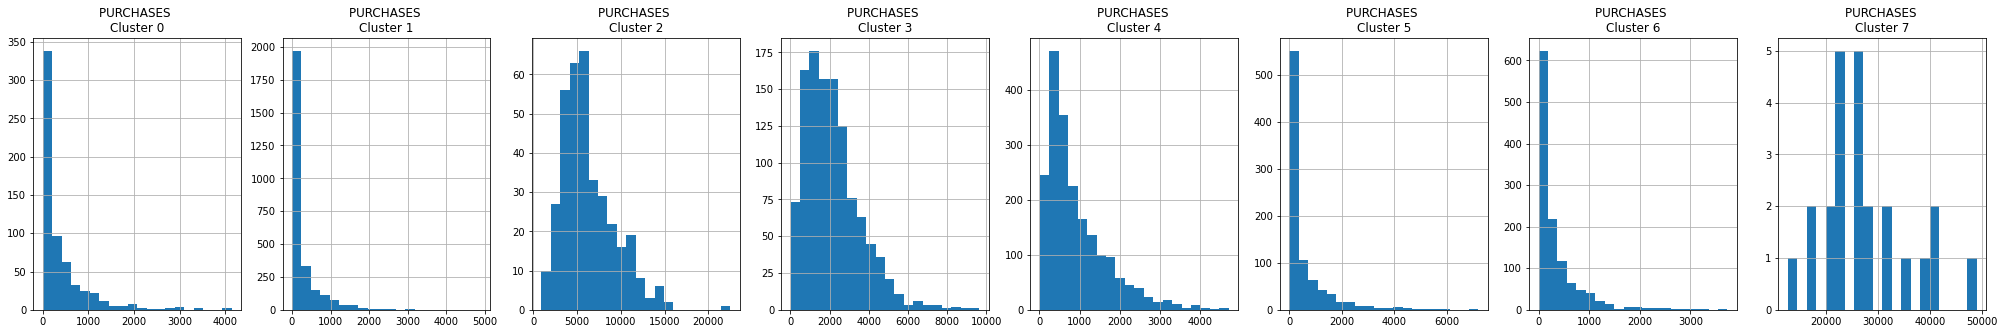

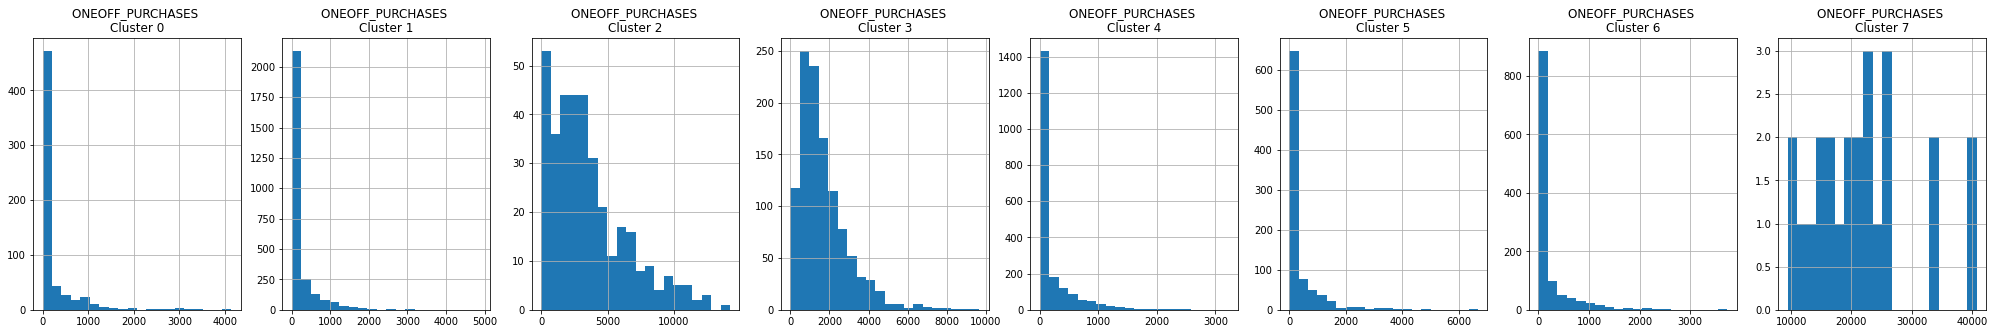

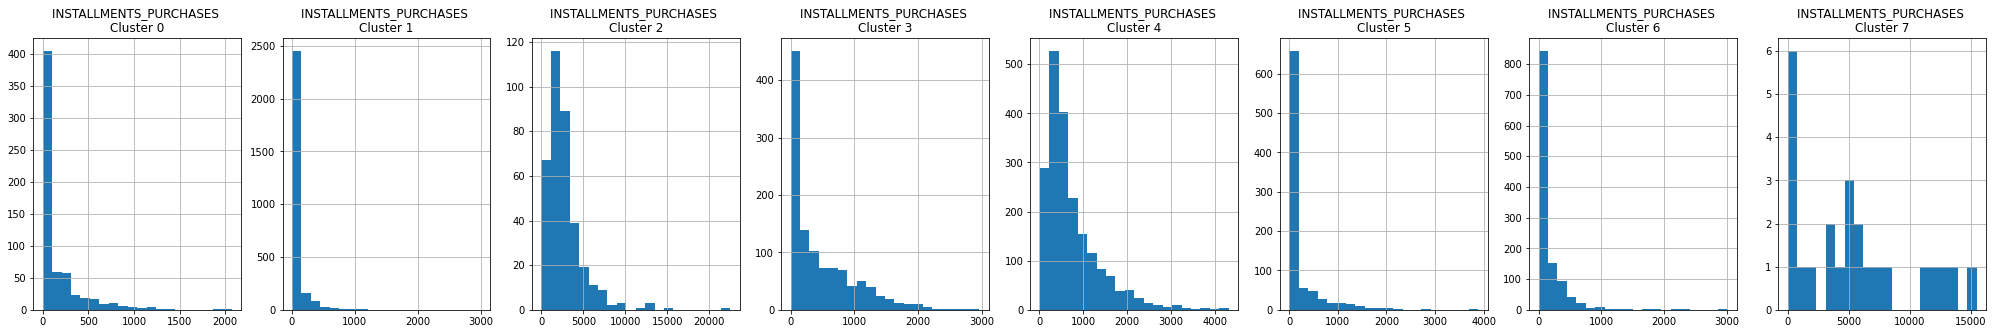

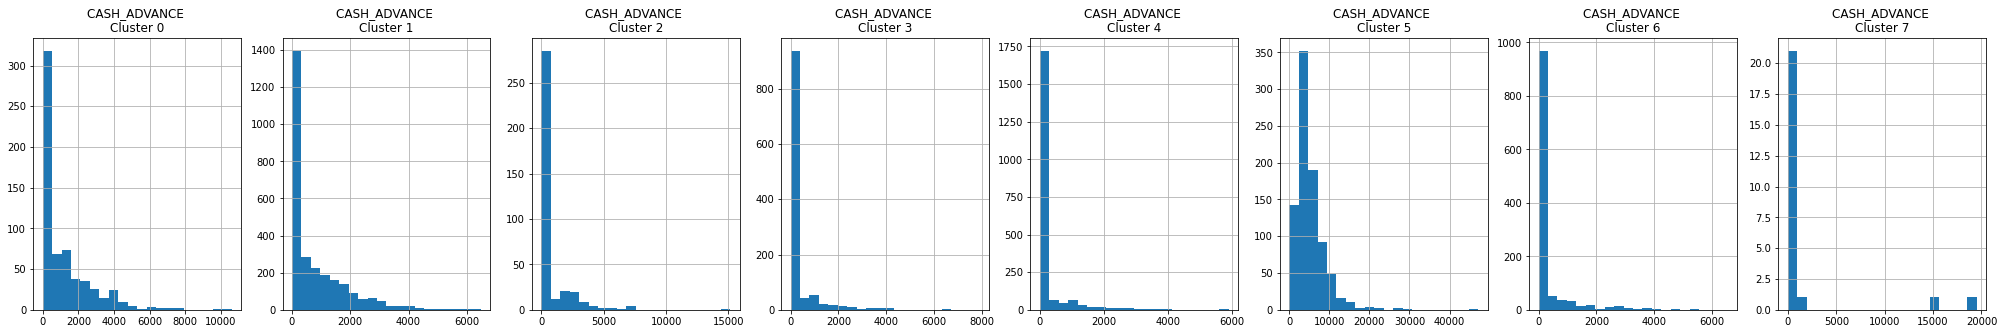

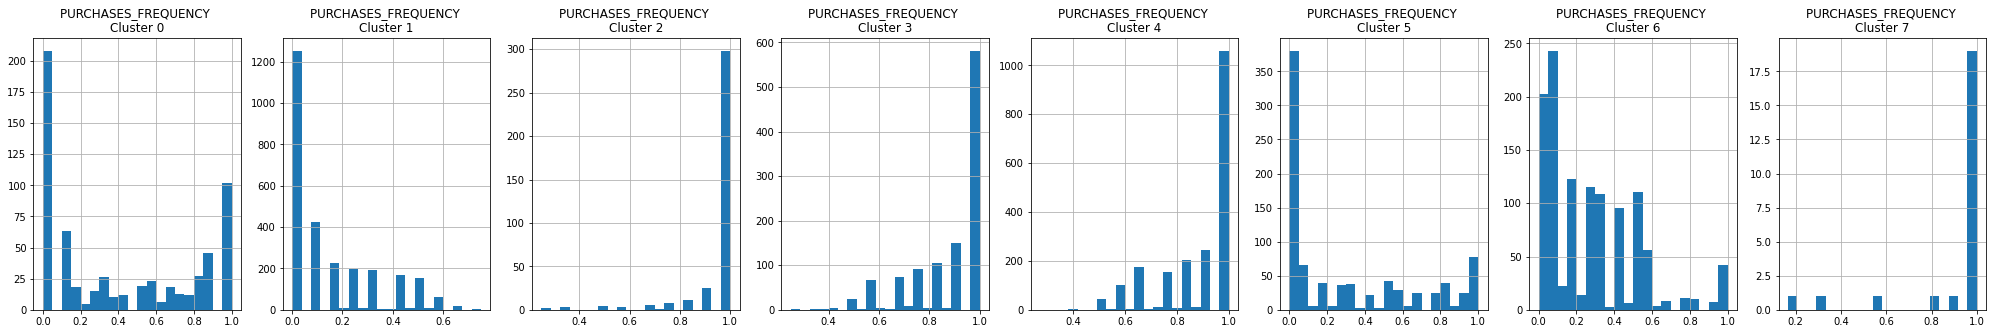

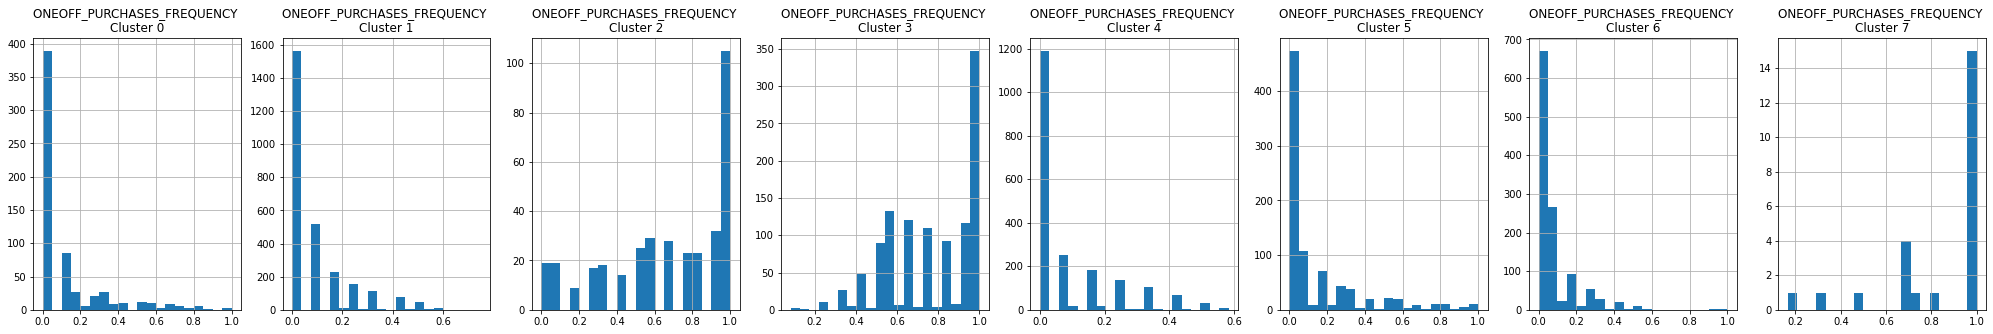

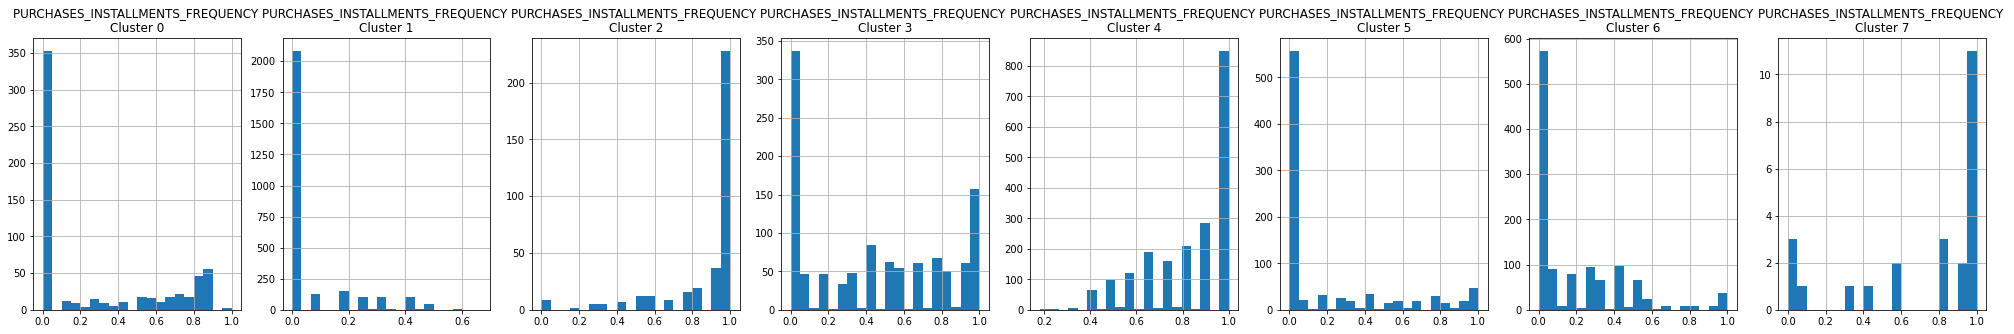

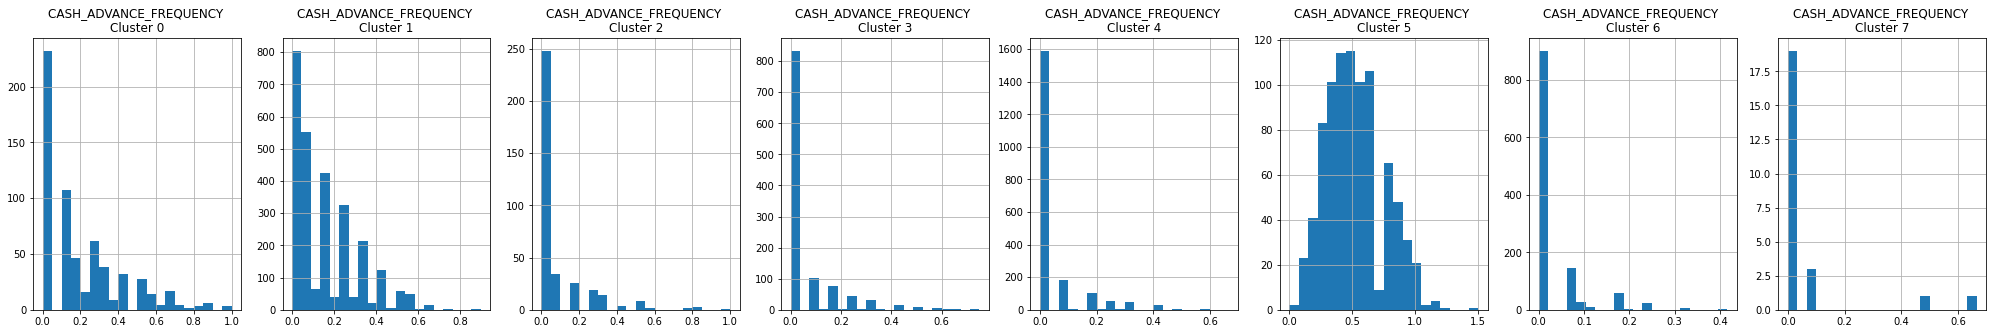

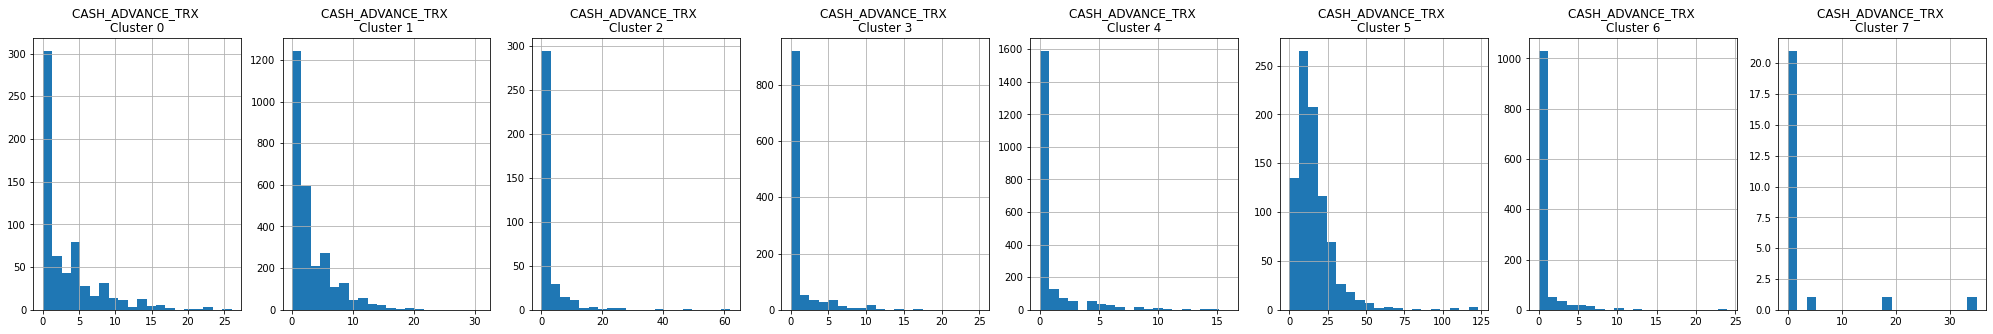

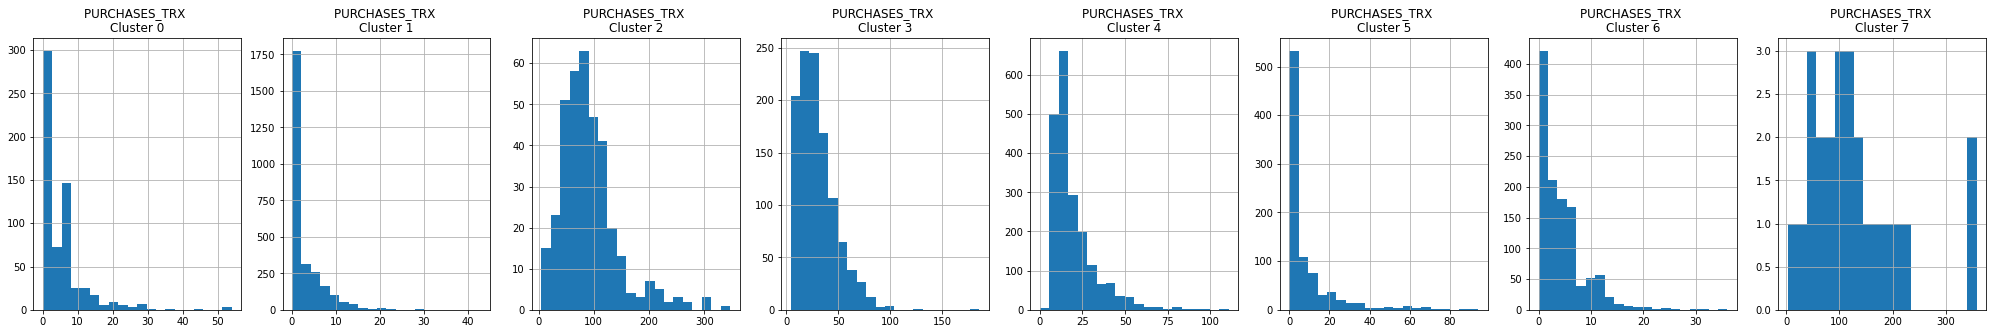

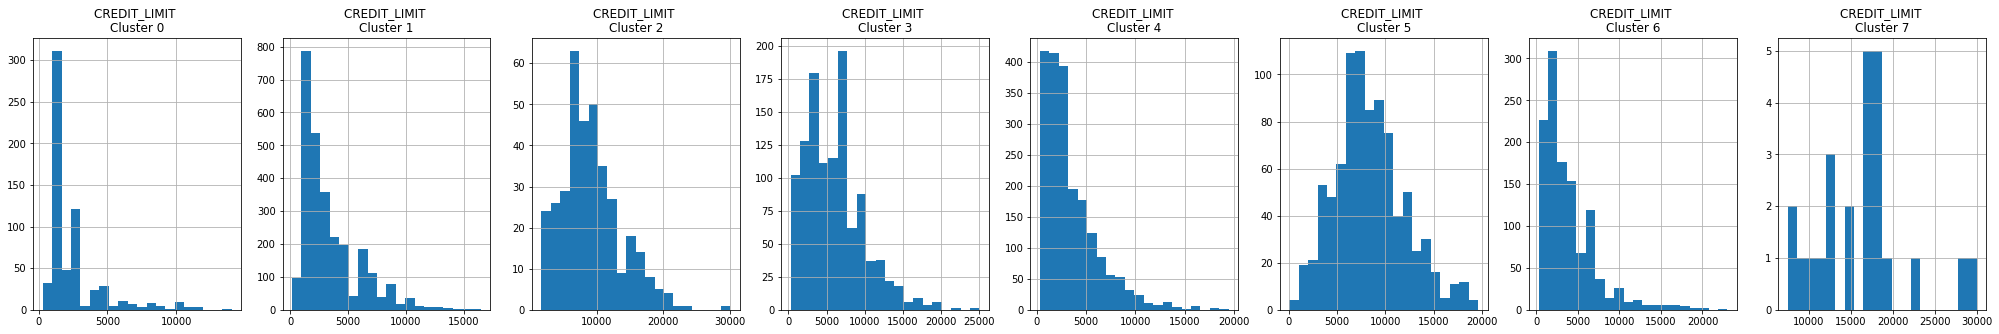

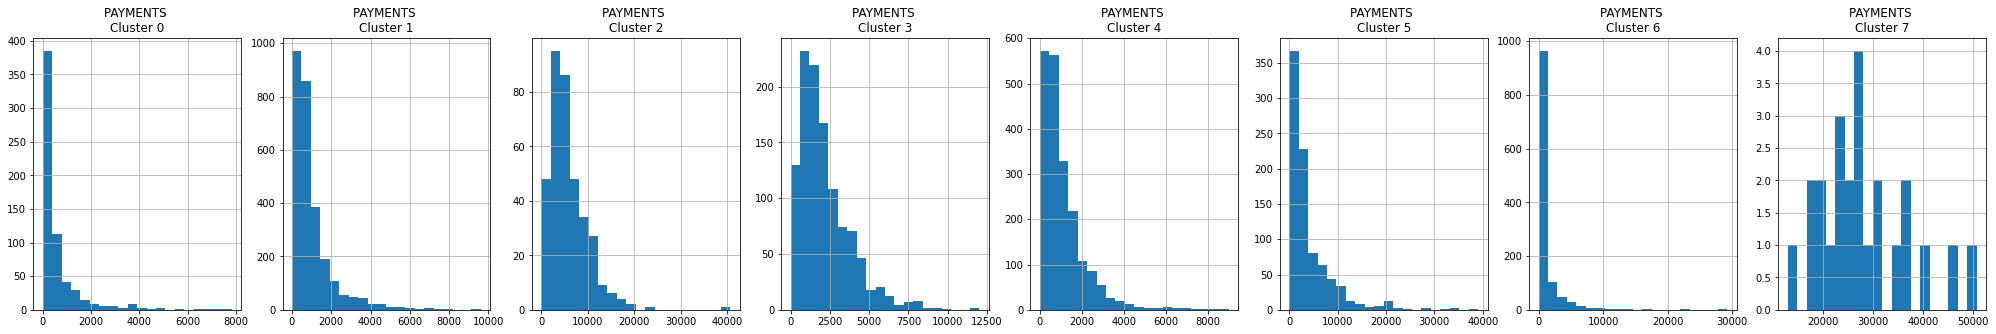

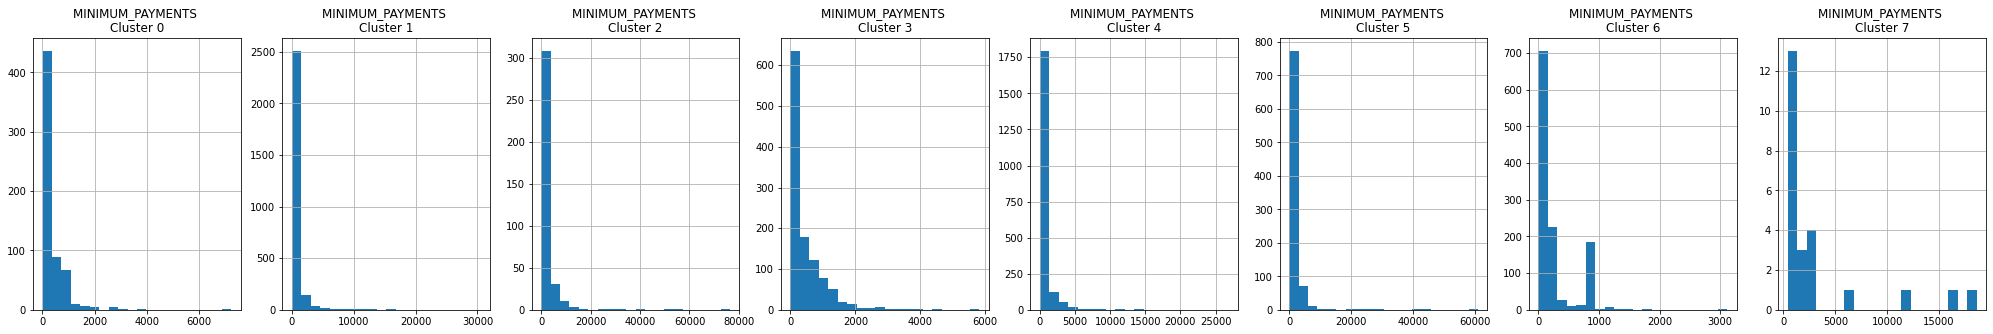

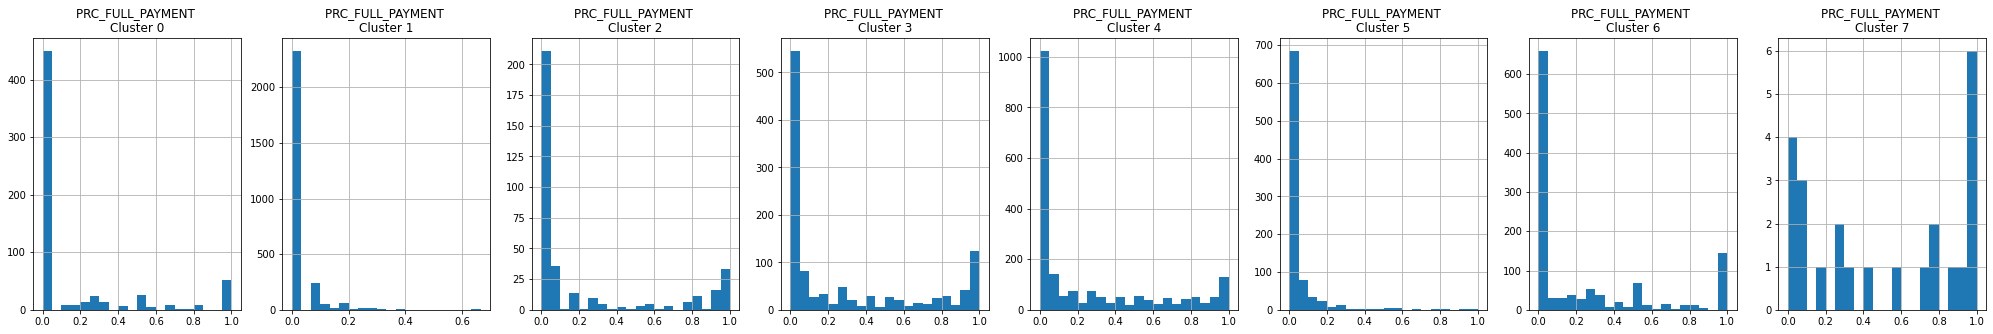

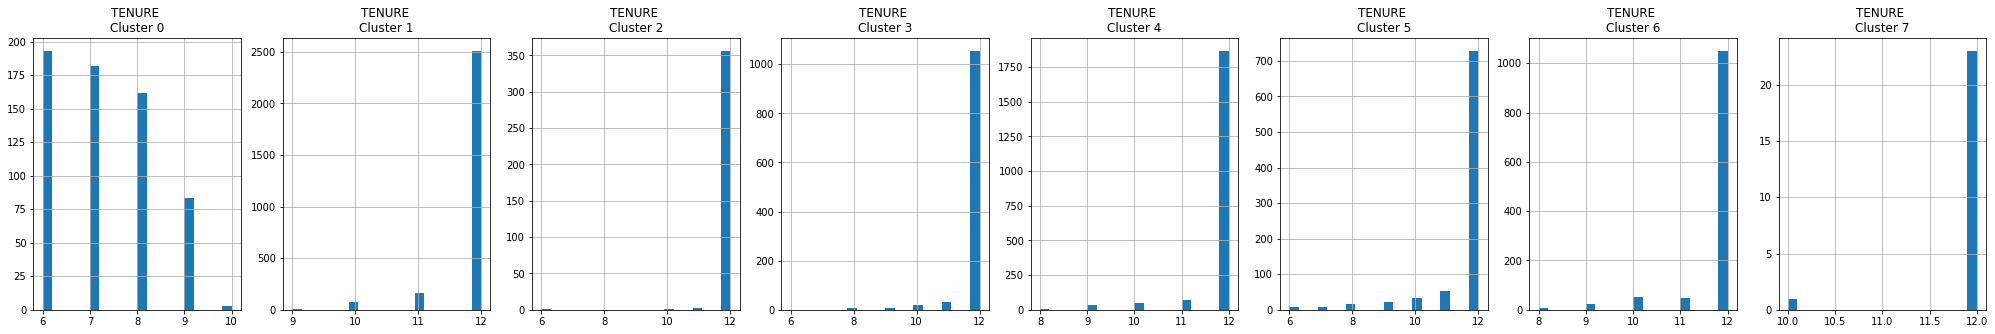

In [254]:
for i in cc_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = cluster_df[cluster_df['clusters'] == j]
        cluster[i].hist(bins = 20)
        plt.title(f'{i} \nCluster {j}')
plt.show()

[Back to the top](#back_to_top)

<a id="pca"></a>
## Principal Component Analysis (PCA)

In this section we will use Principal Component Analysis, an unsupervised machine learning algorithm, to perform dimensionality reduction and do some data visualization. In other words, our primary objective is to find a new set of features so that we can improve our analysis.

I have been meaning to try this unsupervised machine laerning algorithm, and since there is some correlation in our dataset, my understanding is that it could work well to try and reduce some features.

In [103]:
pca = PCA(n_components=2) # we will use only 2 components
principal_comp = pca.fit_transform(df_scaled) #fit the scaled df to the instanciated PCA

We'll create a df with with the principal_comp so that we can concat to the original df and visualize

In [104]:
pca_df = pd.DataFrame(principal_comp, columns=['pca1', 'pca2']) #two components, two columns
pca_df.head()

,pca1,pca2
0,-1.682213,-1.076429
1,-1.138256,2.506610
2,0.969666,-0.383575
3,-0.873629,0.043162
4,-1.599427,-0.688562


We will concat our clusters (established as labels above)to our pca_df

In [105]:
#Make a df from the lables
labels = pd.DataFrame({'cluster':labels})

#concat labels and pca_df
pca_df = pd.concat([pca_df, labels], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682213,-1.076429,0
1,-1.138256,2.506610,4
2,0.969666,-0.383575,1
3,-0.873629,0.043162,0
4,-1.599427,-0.688562,0


<a id="pca_viz"></a>
### Visualization

We will use a scatterplot, plotting all the 8 clusters

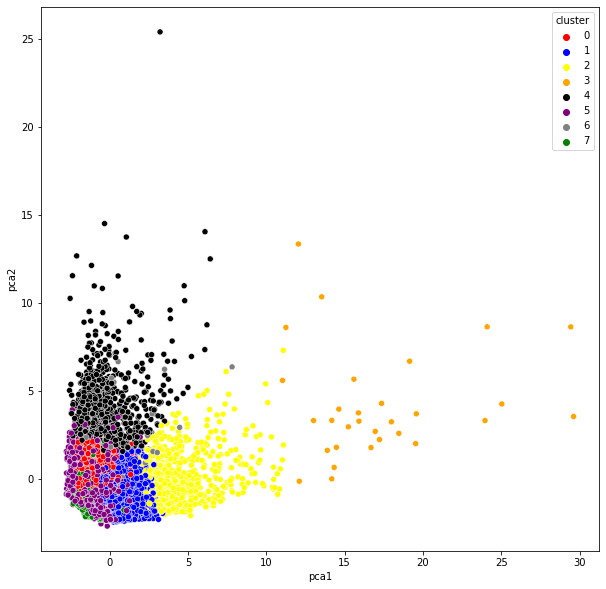

In [106]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = pca_df, x = 'pca1', y = 'pca2', hue = 'cluster', palette = ['red', 'blue', 'yellow', 'orange', 'black', 'purple', 'gray', 'green'])

[Back to the top](#back_to_top)

<a id="DP"></a>
## Deep Learning
### Applying Autoencoders to perform dimensionality reduction

In addition to PCA, we will use Autoenconders to perform dimensionality reduction
There is some correlation in the data so autoencoders might be appropriate

**Import Libraries**

In [255]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [108]:
# since the df has 17 features
input_df = Input(shape = (17,))

#encoder
#fully connected artificial neural network
x = Dense(7, activation = 'relu')(input_df) #Layer 1
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

#encoded layer
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

#decorder network
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder
encoder = Model(input_df, encoded)

#complie
autoencoder.compile(optimizer='adam', loss = 'mean_squared_error')

In [109]:
df_scaled.shape

(8950, 17)

**Train the model with the scaled data**

Here we train autoencoder to perform dimensionality reduction

In [110]:
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs=25, verbose=1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 5s 526us/sample - loss: 0.5823
Epoch 2/25
8950/8950 [==============================] - 4s 429us/sample - loss: 0.2851
Epoch 3/25
8950/8950 [==============================] - 4s 460us/sample - loss: 0.2126
Epoch 4/25
8950/8950 [==============================] - 4s 410us/sample - loss: 0.1764
Epoch 5/25
8950/8950 [==============================] - 5s 593us/sample - loss: 0.1591
Epoch 6/25
8950/8950 [==============================] - 6s 675us/sample - loss: 0.1523
Epoch 7/25
8950/8950 [==============================] - 5s 561us/sample - loss: 0.1425
Epoch 8/25
8950/8950 [==============================] - 6s 666us/sample - loss: 0.1316
Epoch 9/25
8950/8950 [==============================] - 4s 399us/sample - loss: 0.1144
Epoch 10/25
8950/8950 [==============================] - 3s 378us/sample - loss: 0.1066
Epoch 11/25
8950/8950 [==============================] - 3s 373us/sample - loss: 0.0985
Epoch 12/25
8950/89

We had 2.3 million parameters!

In [111]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              2200

[Back to the top](#back_to_top)

<a id="kencoder"></a>
## K Means Algorithm Using Dimensionality Reduction

Take the new features (after pred auto encoder) and apply k means

Find the optimal number of clusters

Apply kmeans

PCA

Visuzalization

In [122]:
pred = encoder.predict(df_scaled)
pred.shape

(8950, 10)

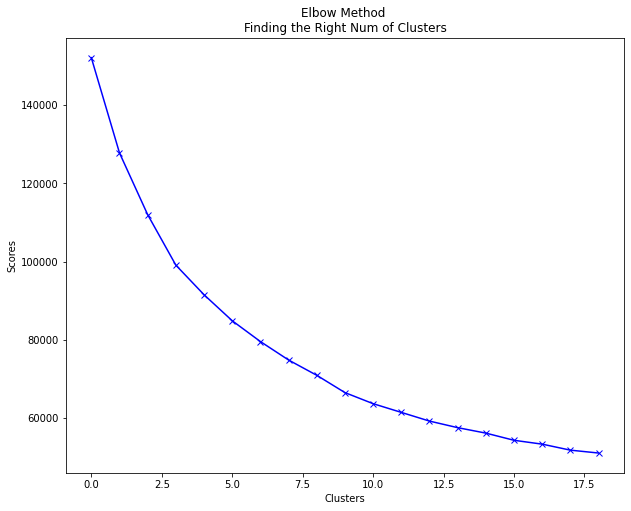

In [123]:
scores_2 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Elbow Method \nFinding the Right Num of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

**Scores 1 v Scores 2**

Kmeans versus Kmean + autoencoder

/Users/carlozgil/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.
/Users/carlozgil/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  


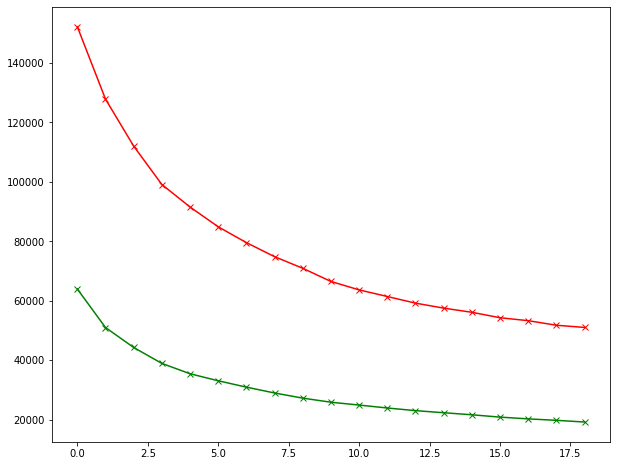

In [124]:
plt.plot(scores, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

We could maybe do 2 or 3 clusters instead of the 8

**KMeans with 4 clusters**

In [125]:
kmeans = KMeans(n_clusters=4)

In [126]:
kmeans.fit(pred)
labels = kmeans.labels_

In [128]:
df_cluster_dr = pd.concat([cc_df, pd.DataFrame({'cluster':lables})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


**Principle Component Analysis**

In [131]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns=['pca1', 'pca2'])

In [132]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':lables})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.577627,-0.277392,0
1,0.422518,1.227631,2
2,-0.629386,-0.308832,0
3,-0.904444,0.219091,0
4,-1.497543,-0.092913,0


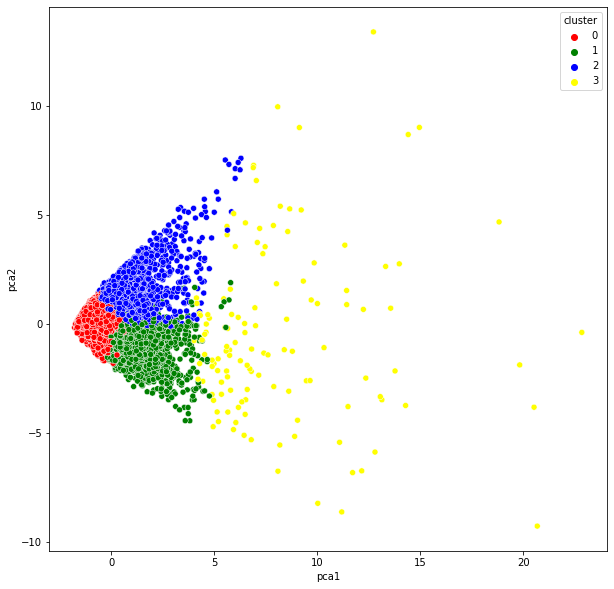

In [133]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = pca_df, x = 'pca1', y = 'pca2', hue = 'cluster', palette = ['red', 'green', 'blue', 'yellow'])

[Back to the top](#back_to_top)